## Importing and extracting data



In [ ]:
# connecting drive and shared folder
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# importing packages necessary
import os
import zipfile
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import calendar
from datetime import datetime, timedelta

In [ ]:
# saving path directory as variable to be used
directory_path = '/content/drive/Shareddrives/Ai/What are we doing(AI)?/Data/2024_02_24_Data_sets'
unzip_location = '/content/drive/Shareddrives/Ai/What are we doing(AI)?/Data/2024_02_24_Data_sets/Extract Data'
# reading files inside the drive
files = os.listdir(directory_path)
# selecting only zip files from the list of files available in the directory
zip_files = [file for file in files if file.endswith('.zip')]

# looping through the zip files and extracting them
for zip_file in zip_files:
  zip_path = os.path.join(directory_path, zip_file)

  with zipfile.ZipFile(zip_path, 'r') as zip_ref:
      zip_ref.extractall(unzip_location)

In [ ]:
# creating paths as variables to use
building_csv = '/content/drive/Shareddrives/Ai/What are we doing(AI)?/Data/2024_02_24_Data_sets/Extract Data/train.csv'
weather_csv = '/content/drive/Shareddrives/Ai/What are we doing(AI)?/Data/2024_02_24_Data_sets/Extract Data/weather.csv'
meta_csv = '/content/drive/Shareddrives/Ai/What are we doing(AI)?/Data/2024_02_24_Data_sets/metadata.csv'

# reading using pandas
meta_data = pd.read_csv(meta_csv, index_col=0)
building_data = pd.read_csv(building_csv, index_col=0)
weather_data  = pd.read_csv(weather_csv, index_col=0)

In [ ]:
housing_data = pd.read_csv('/content/sample_data/california_housing_test.csv')

# Understanding Data




In [ ]:
# visualizing the data structure from our data sets
print(meta_data.shape)
print(building_data.shape)
print(weather_data.shape)

(251, 31)
(266266, 4)
(83710, 10)


In [ ]:
# glancing at the meta data
print(meta_data.head())

     building_id  site_id  site_id_kaggle primaryspaceusage  \
136          432  Trapano           143.0         Education   
137          416  Trapano           143.0         Education   
138          436  Trapano           143.0         Education   
139          441  Trapano           143.0         Education   
140          442  Trapano           143.0         Education   

    sub_primaryspaceusage     sqm     sqft       lat       lng       timezone  \
136     College Classroom  4703.0  50623.0  51.51879 -0.134556  Europe/London   
137     College Classroom   499.3   5374.0  51.51879 -0.134556  Europe/London   
138     College Classroom  9061.0  97532.0  51.51879 -0.134556  Europe/London   
139    College Laboratory  7579.0  81580.0  51.51879 -0.134556  Europe/London   
140    College Laboratory  5295.0  56995.0  51.51879 -0.134556  Europe/London   

     ... yearbuilt date_opened  numberoffloors  occupants energystarscore  \
136  ...       NaN         NaN             5.0        NaN

In [ ]:
# checking for data types
meta_data.info()
'''print(meta_data["site_id"].unique())
print(meta_data["site_id_kaggle"].unique())
print(meta_data["lat"].unique())
print(meta_data["lng"].unique())
print(meta_data["primaryspaceusage"].unique())
print(meta_data["sub_primaryspaceusage"].unique())
print(meta_data["industry"].unique())
print(meta_data["subindustry"].unique())
print(meta_data["date_opened"].unique())
print(meta_data["energystarscore"].unique())
print(meta_data["rating"].unique())
# print(meta_data["leed_level"].unique())'''
# print(meta_data['timezone'].unique())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 136 to 1635
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   building_id            251 non-null    int64  
 1   site_id                251 non-null    object 
 2   site_id_kaggle         235 non-null    float64
 3   primaryspaceusage      251 non-null    object 
 4   sub_primaryspaceusage  251 non-null    object 
 5   sqm                    251 non-null    float64
 6   sqft                   251 non-null    float64
 7   lat                    251 non-null    float64
 8   lng                    251 non-null    float64
 9   timezone               251 non-null    object 
 10  electricity            250 non-null    object 
 11  hotwater               15 non-null     object 
 12  chilledwater           0 non-null      float64
 13  steam                  0 non-null      float64
 14  water                  16 non-null     object 
 15  irr

'print(meta_data["site_id"].unique())\nprint(meta_data["site_id_kaggle"].unique())\nprint(meta_data["lat"].unique())\nprint(meta_data["lng"].unique())\nprint(meta_data["primaryspaceusage"].unique())\nprint(meta_data["sub_primaryspaceusage"].unique())\nprint(meta_data["industry"].unique())\nprint(meta_data["subindustry"].unique())\nprint(meta_data["date_opened"].unique())\nprint(meta_data["energystarscore"].unique())\nprint(meta_data["rating"].unique())\n# print(meta_data["leed_level"].unique())'

In [ ]:
# storing columns to be dropped in a list
metadata_columns_to_drop = ['date_opened','site_id_kaggle',"lat", "lng", "sqft",'energystarscore','eui','site_eui','source_eui','leed_level','chilledwater','steam','irrigation','solar'] #,'industry','subindustry'
print(len(metadata_columns_to_drop))
# dropping the columns
meta_data = meta_data.drop(columns=metadata_columns_to_drop)

14


In [ ]:
# glancing at the meta data
print(meta_data.head())

     building_id  site_id primaryspaceusage sub_primaryspaceusage     sqm  \
136          432  Trapano         Education     College Classroom  4703.0   
137          416  Trapano         Education     College Classroom   499.3   
138          436  Trapano         Education     College Classroom  9061.0   
139          441  Trapano         Education    College Laboratory  7579.0   
140          442  Trapano         Education    College Laboratory  5295.0   

          timezone electricity hotwater water  gas   industry  \
136  Europe/London         Yes      NaN   NaN  NaN  Education   
137  Europe/London         Yes      Yes   NaN  NaN  Education   
138  Europe/London         Yes      NaN   NaN  NaN  Education   
139  Europe/London         Yes      NaN   NaN  NaN  Education   
140  Europe/London         Yes      Yes   NaN  NaN  Education   

            subindustry   heatingtype  yearbuilt  numberoffloors  occupants  \
136  College/University         Steam        NaN             5.0   

In [ ]:
# glancing at the building data
print(building_data.head())

   building_id         day  meter  meter_reading
0            2  2016-02-02    595          102.6
1            2  2016-02-02    207            0.3
2            2  2016-02-03    595           88.8
3            2  2016-02-03    207            0.1
4            2  2016-02-04    595           76.3


In [ ]:
# checking for data types
building_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266266 entries, 0 to 266265
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   building_id    266266 non-null  int64  
 1   day            266266 non-null  object 
 2   meter          266266 non-null  int64  
 3   meter_reading  266266 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 10.2+ MB


In [ ]:
# checking for data types
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83710 entries, 18121 to 330973
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   timestamp       83710 non-null  object 
 1   site_id         83710 non-null  object 
 2   airTemperature  83705 non-null  float64
 3   cloudCoverage   31651 non-null  float64
 4   dewTemperature  83705 non-null  float64
 5   precipDepth1HR  0 non-null      float64
 6   precipDepth6HR  5334 non-null   float64
 7   seaLvlPressure  66743 non-null  float64
 8   windDirection   83145 non-null  float64
 9   windSpeed       83706 non-null  float64
dtypes: float64(8), object(2)
memory usage: 7.0+ MB


In [ ]:
# checking for data types
weather_data.info()
# print(weather_data["airTemperature"].unique())
# print(weather_data["site_id"].unique())
# print(weather_data["timestamp"].unique())
# print(weather_data["cloudCoverage"].unique())
# print(weather_data["precipDepth6HR"].unique())
# print(weather_data["dewTemperature"].unique())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 83710 entries, 18121 to 330973
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   timestamp       83710 non-null  object 
 1   site_id         83710 non-null  object 
 2   airTemperature  83705 non-null  float64
 3   cloudCoverage   31651 non-null  float64
 4   dewTemperature  83705 non-null  float64
 5   precipDepth1HR  0 non-null      float64
 6   precipDepth6HR  5334 non-null   float64
 7   seaLvlPressure  66743 non-null  float64
 8   windDirection   83145 non-null  float64
 9   windSpeed       83706 non-null  float64
dtypes: float64(8), object(2)
memory usage: 7.0+ MB


# Droping

In [ ]:
# storing columns to be dropped in a list
weather_columns_to_drop = ['precipDepth1HR','precipDepth6HR','windDirection'] #,'dewTemperature''seaLvlPressure',
# dropping the columns
weather_data = weather_data.drop(columns=weather_columns_to_drop)

In [ ]:
# getting all the data types and values of weather data
weather_data.describe()

,airTemperature,cloudCoverage,dewTemperature,seaLvlPressure,windSpeed
count,83705.000000,31651.000000,83705.000000,66743.000000,83706.000000
mean,12.043113,3.625626,8.309124,1016.824290,4.974567
std,5.719866,3.348387,4.914800,10.206083,2.421134
min,-4.700000,0.000000,-7.800000,968.400000,0.000000
25%,7.900000,0.500000,4.500000,1011.000000,3.200000
50%,12.000000,1.800000,8.700000,1017.800000,4.600000
75%,16.000000,7.300000,12.100000,1023.500000,6.400000
max,34.800000,10.000000,21.500000,1046.100000,23.400000


In [ ]:
# glancing at the weather data
print(weather_data.head())

                 timestamp  site_id  airTemperature  cloudCoverage  \
18121  2016-02-01 01:00:00  Trapano            11.3            0.9   
18122  2016-02-01 02:00:00  Trapano            12.3            0.6   
18123  2016-02-01 03:00:00  Trapano            12.1            0.6   
18124  2016-02-01 04:00:00  Trapano            12.4            0.7   
18125  2016-02-01 05:00:00  Trapano            11.6            0.5   

       dewTemperature  seaLvlPressure  windSpeed  
18121            10.5          1024.0        3.4  
18122            10.8          1023.8        5.2  
18123             9.7          1022.7        5.1  
18124             9.8          1021.8        5.4  
18125             9.3          1021.6        5.1  


In [ ]:
# looking at the available columns
meta_data.head()

,building_id,site_id,primaryspaceusage,sub_primaryspaceusage,sqm,timezone,electricity,hotwater,water,gas,industry,subindustry,heatingtype,yearbuilt,numberoffloors,occupants,rating
136,432,Trapano,Education,College Classroom,4703.0,Europe/London,Yes,NaN,NaN,NaN,Education,College/University,Steam,NaN,5.0,NaN,G
137,416,Trapano,Education,College Classroom,499.3,Europe/London,Yes,Yes,NaN,NaN,Education,College/University,Heat network,NaN,4.0,NaN,NaN
138,436,Trapano,Education,College Classroom,9061.0,Europe/London,Yes,NaN,NaN,NaN,Education,College/University,Heat network,2005.0,10.0,NaN,F
139,441,Trapano,Education,College Laboratory,7579.0,Europe/London,Yes,NaN,NaN,NaN,Education,College/University,Heat network,1913.0,5.0,NaN,NaN
140,442,Trapano,Education,College Laboratory,5295.0,Europe/London,Yes,Yes,NaN,NaN,Education,College/University,Heat network,1953.0,6.0,NaN,G


In [ ]:
meta_data.describe()

,building_id,sqm,yearbuilt,numberoffloors,occupants
count,251.000000,251.000000,199.000000,224.000000,113.000000
mean,322.454183,4958.507171,1960.592965,3.683036,402.929204
std,182.534514,4910.514567,26.032228,2.896182,398.438239
min,2.000000,358.000000,1900.000000,1.000000,0.000000
25%,171.000000,1448.000000,1945.000000,2.000000,133.000000
50%,330.000000,2957.000000,1966.000000,2.000000,293.000000
75%,474.500000,6359.500000,1976.000000,5.250000,464.000000
max,632.000000,25605.000000,2013.000000,16.000000,1695.000000


In [ ]:
building_data.head()

,building_id,day,meter,meter_reading
0,2,2016-02-02,595,102.6
1,2,2016-02-02,207,0.3
2,2,2016-02-03,595,88.8
3,2,2016-02-03,207,0.1
4,2,2016-02-04,595,76.3


In [ ]:
building_data.describe()

,building_id,meter,meter_reading
count,266266.00000,266266.000000,266266.000000
mean,307.23445,462.803828,3334.654306
std,186.33949,182.312420,19099.478354
min,2.00000,207.000000,0.000000
25%,153.00000,207.000000,20.100000
50%,290.00000,595.000000,306.269250
75%,473.00000,595.000000,1555.301250
max,632.00000,649.000000,500164.777000


In [ ]:
weather_data.head()

,timestamp,site_id,airTemperature,cloudCoverage,dewTemperature,seaLvlPressure,windSpeed
18121,2016-02-01 01:00:00,Trapano,11.3,0.9,10.5,1024.0,3.4
18122,2016-02-01 02:00:00,Trapano,12.3,0.6,10.8,1023.8,5.2
18123,2016-02-01 03:00:00,Trapano,12.1,0.6,9.7,1022.7,5.1
18124,2016-02-01 04:00:00,Trapano,12.4,0.7,9.8,1021.8,5.4
18125,2016-02-01 05:00:00,Trapano,11.6,0.5,9.3,1021.6,5.1


In [ ]:
weather_data.describe()

,airTemperature,cloudCoverage,dewTemperature,seaLvlPressure,windSpeed
count,83705.000000,31651.000000,83705.000000,66743.000000,83706.000000
mean,12.043113,3.625626,8.309124,1016.824290,4.974567
std,5.719866,3.348387,4.914800,10.206083,2.421134
min,-4.700000,0.000000,-7.800000,968.400000,0.000000
25%,7.900000,0.500000,4.500000,1011.000000,3.200000
50%,12.000000,1.800000,8.700000,1017.800000,4.600000
75%,16.000000,7.300000,12.100000,1023.500000,6.400000
max,34.800000,10.000000,21.500000,1046.100000,23.400000


In [ ]:
for c in meta_data.columns:
  if len(meta_data[c].unique())<5:
    print(c)
    print("---\n", meta_data[c].value_counts()/meta_data.shape[0])

timezone
---
 Europe/London    0.856574
Europe/Dublin    0.143426
Name: timezone, dtype: float64
electricity
---
 Yes    0.996016
Name: electricity, dtype: float64
hotwater
---
 Yes    0.059761
Name: hotwater, dtype: float64
water
---
 Yes    0.063745
Name: water, dtype: float64
gas
---
 Yes    0.545817
Name: gas, dtype: float64
industry
---
 Education      0.649402
Government     0.318725
Healthcare     0.023904
Hospitality    0.007968
Name: industry, dtype: float64


# Converting Categorical data as boolean values for two values and assigning numerical values for multicategorical values

In [ ]:
print(meta_data.head())

     building_id  site_id primaryspaceusage sub_primaryspaceusage     sqm  \
136          432  Trapano         Education     College Classroom  4703.0   
137          416  Trapano         Education     College Classroom   499.3   
138          436  Trapano         Education     College Classroom  9061.0   
139          441  Trapano         Education    College Laboratory  7579.0   
140          442  Trapano         Education    College Laboratory  5295.0   

          timezone electricity hotwater water  gas   industry  \
136  Europe/London         Yes      NaN   NaN  NaN  Education   
137  Europe/London         Yes      Yes   NaN  NaN  Education   
138  Europe/London         Yes      NaN   NaN  NaN  Education   
139  Europe/London         Yes      NaN   NaN  NaN  Education   
140  Europe/London         Yes      Yes   NaN  NaN  Education   

            subindustry   heatingtype  yearbuilt  numberoffloors  occupants  \
136  College/University         Steam        NaN             5.0   

In [ ]:
# reversing the boolean values after converting into 0s and 1s
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# res = []
res_w = le.fit_transform(meta_data['water'])
res_e = le.fit_transform(meta_data['electricity'])
res_h = le.fit_transform(meta_data['hotwater'])
res_g = le.fit_transform(meta_data['gas'])
# res = pd.Series(res)
# res = pd.concat([res, pd.Series(le.fit_transform(meta_data['electricity']))], ignore_index=True)
# res = pd.concat([res, pd.Series(le.fit_transform(meta_data['hotwater']))], ignore_index=True)
# res = pd.concat([res, pd.Series(le.fit_transform(meta_data['gas']))], ignore_index=True)
# le.fit_transform(meta_data['hotwater'])
# le.fit_transform(meta_data['gas'])
# res = le.fit_transform(meta_data["water",'electricity','hotwater','gas','timezone'])
meta_water = 1 - res_w
meta_ele = 1 - res_e
meta_hotwat = 1 - res_h
meta_gas = 1 - res_g  # now it's reverse, exactly as we wanted it to be
# print(res.head())

In [ ]:
print(meta_water)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0
 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0]


In [ ]:
# assigning the changed values to the main data frame
meta_data['water'] = meta_water
meta_data['electricity'] = meta_ele
meta_data['hotwater'] = meta_hotwat
meta_data['gas'] = meta_gas

In [ ]:
timezone_encoding = {'Europe/London': 0, 'Europe/Dublin': 1 }
meta_data['timezone'] = meta_data['timezone'].replace(timezone_encoding)

In [ ]:
meta_data['site_id'].unique()

array(['Trapano', 'Gunnar', 'Vorr', 'Nymeria', 'Korv'], dtype=object)

In [ ]:
siteid_encoding = {'Trapano': 1, 'Gunnar': 2, 'Vorr': 3, 'Nymeria': 4, 'Korv': 5}
meta_data['site_id'] = meta_data['site_id'].replace(siteid_encoding)

In [ ]:
meta_data['heatingtype'].unique()

array(['Steam', 'Heat network', 'Oil', 'Gas', 'Heat network and steam',
       'Electric', 'Heat network but not ours', 'Electricity', 'Biomass',
       nan, 'District Heating', 'Boiler fed central heating',
       'Gas Boilers'], dtype=object)

In [ ]:
heatype_encoding = {'Steam': 1, 'Heat network': 2, 'Oil': 3, 'Gas':4, 'Heat network and steam': 5,
       'Electric': 6, 'Heat network but not ours': 7, 'Electricity': 8, 'Biomass': 9,
       'nan': 13, 'District Heating': 10, 'Boiler fed central heating': 11,
       'Gas Boilers': 12}

In [ ]:
meta_data['heatingtype'] = meta_data['heatingtype'].replace(heatype_encoding)

In [ ]:
meta_data['primaryspaceusage'].unique()

array(['Education', 'Lodging/residential',
       'Entertainment/public assembly', 'Public services', 'Office',
       'Other', 'Healthcare', 'Manufacturing/industrial',
       'Food sales and service', 'Warehouse/storage', 'Retail',
       'Technology/science'], dtype=object)

In [ ]:
meta_data['sub_primaryspaceusage'].unique()

array(['College Classroom', 'College Laboratory', 'Dormitory',
       'Gymnasium', 'Library', 'Office', 'Animal Kennels', 'Campsites',
       'Community Center', 'Creamatorium', 'Greenhouse', 'Hotel',
       'Industrial', 'Market', 'Museum', 'Park',
       'Primary/Secondary Classroom', 'Sports Stadium', 'Theater',
       'Warehouse', 'Retail', 'Data Centre', 'School', 'Fitness Center',
       'Hospital', 'Laboratory'], dtype=object)

In [ ]:
primaryspace_encoding = {'Education': 1, 'Lodging/residential': 2,
       'Entertainment/public assembly': 3, 'Public services': 4, 'Office': 5,
       'Other': 12, 'Healthcare': 6, 'Manufacturing/industrial': 7,
       'Food sales and service': 8, 'Warehouse/storage': 9, 'Retail': 10,
       'Technology/science': 11}

In [ ]:
meta_data['primaryspaceusage'] = meta_data['primaryspaceusage'].replace(primaryspace_encoding)

In [ ]:
subprimary_encoding = {'College Classroom': 1, 'College Laboratory': 2, 'Dormitory': 3,
       'Gymnasium': 4, 'Library': 5, 'Office': 6, 'Animal Kennels': 7, 'Campsites': 8,
       'Community Center': 9, 'Creamatorium': 10, 'Greenhouse': 11, 'Hotel': 12,
       'Industrial': 13, 'Market': 14, 'Museum': 15, 'Park': 16,
       'Primary/Secondary Classroom': 17, 'Sports Stadium': 18, 'Theater': 19,
       'Warehouse': 20, 'Retail': 21, 'Data Centre': 22, 'School': 23, 'Fitness Center': 24,
       'Hospital': 25, 'Laboratory': 26}

In [ ]:
meta_data['sub_primaryspaceusage'] = meta_data['sub_primaryspaceusage'].replace(subprimary_encoding)

In [ ]:
meta_data.head()

,building_id,site_id,primaryspaceusage,sub_primaryspaceusage,sqm,timezone,electricity,hotwater,water,gas,industry,subindustry,heatingtype,yearbuilt,numberoffloors,occupants,rating
136,432,1,1,1,4703.0,0,1,0,0,0,Education,College/University,1.0,NaN,5.0,NaN,G
137,416,1,1,1,499.3,0,1,1,0,0,Education,College/University,2.0,NaN,4.0,NaN,NaN
138,436,1,1,1,9061.0,0,1,0,0,0,Education,College/University,2.0,2005.0,10.0,NaN,F
139,441,1,1,2,7579.0,0,1,0,0,0,Education,College/University,2.0,1913.0,5.0,NaN,NaN
140,442,1,1,2,5295.0,0,1,1,0,0,Education,College/University,2.0,1953.0,6.0,NaN,G


In [ ]:
meta_data['industry'].unique()

array(['Education', 'Government', 'Hospitality', 'Healthcare'],
      dtype=object)

In [ ]:
industry_encoding = {'Education': 1 ,
                        'Government': 2, 'Hospitality': 3, 'Healthcare': 4}
meta_data['industry'] = meta_data['industry'].replace(industry_encoding)

In [ ]:
meta_data['subindustry'].unique()

array(['College/University', 'Animal Control', 'Public Assembly',
       'City, County, State', 'Social Services', 'Hotel',
       'Water & Wastewater Treatment Facility', 'Library',
       'Primary/Secondary School', 'Other Government Buildings',
       'Hospital', 'Laboratory'], dtype=object)

In [ ]:
sub_industry_encoding = {'College/University': 1, 'Animal Control': 2, 'Public Assembly': 3,
       'City, County, State': 4, 'Social Services' : 5, 'Hotel': 6,
       'Water & Wastewater Treatment Facility': 7, 'Library': 8,
       'Primary/Secondary School' : 9, 'Other Government Buildings' : 10,
       'Hospital': 11, 'Laboratory' : 12}
meta_data['subindustry'] = meta_data['subindustry'].replace(sub_industry_encoding)

In [ ]:
meta_data['rating'].unique()

array(['G', nan, 'F', 'E', 'B', 'D', 'C', 'A', 'C1', 'D1'], dtype=object)

In [ ]:
rating_encoding = {'A': 9, 'B': 8, 'C': 7, 'C1': 6, 'D': 5, 'D1':4, 'E':3, 'F':2, 'G':1, 'nan': 10}
meta_data['rating'] = (meta_data['rating'].replace(rating_encoding))

In [ ]:
meta_data['rating'].unique()

array([ 1., nan,  2.,  3.,  8.,  5.,  7.,  9.,  6.,  4.])

In [ ]:
meta_data['rating'].nunique()
# unique_rating_count = meta_data['rating']

9

In [ ]:
print(meta_data.head())

     building_id  site_id  primaryspaceusage  sub_primaryspaceusage     sqm  \
136          432        1                  1                      1  4703.0   
137          416        1                  1                      1   499.3   
138          436        1                  1                      1  9061.0   
139          441        1                  1                      2  7579.0   
140          442        1                  1                      2  5295.0   

     timezone  electricity  hotwater  water  gas  industry  subindustry  \
136         0            1         0      0    0         1            1   
137         0            1         1      0    0         1            1   
138         0            1         0      0    0         1            1   
139         0            1         0      0    0         1            1   
140         0            1         1      0    0         1            1   

     heatingtype  yearbuilt  numberoffloors  occupants  rating  
136      

In [ ]:
meter_dict = {595:1, 207:2, 649:3, 413:4}
building_data["meter"].replace(meter_dict, inplace=True)

print(meta_data.head())

# Dealing with missing value

just to check after merging

In [ ]:
for c in full_data.columns:
    if len(full_data[c].isna().unique())>1:
        print(full_data[c].isna().value_counts())
        print("\n")

NameError: name 'full_data' is not defined

In [ ]:
for c in meta_data.columns:
    if len(meta_data[c].isna().unique())>1:
        print(meta_data[c].isna().value_counts())
        print("\n")

False    215
True      36
Name: heatingtype, dtype: int64


False    199
True      52
Name: yearbuilt, dtype: int64


False    224
True      27
Name: numberoffloors, dtype: int64


True     138
False    113
Name: occupants, dtype: int64


False    184
True      67
Name: rating, dtype: int64




In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=5)
cols_to_drop = ["occupants", "rating", "heatingtype", "building_id", 'yearbuilt', 'numberoffloors' ]
Xr = meta_data.loc[meta_data["rating"].isna()==False].drop(columns=cols_to_drop)
Yr = meta_data.loc[meta_data["rating"].isna()==False]["rating"]
missing_Xr = meta_data.loc[meta_data["rating"].isna()].drop(columns=cols_to_drop)
model.fit(Xr, Yr)
missing_Yr = model.predict(missing_Xr)
missing_Yr

array([4.2, 3. , 3.6, 5.2, 4.8, 3.4, 6.8, 4. , 5.2, 4.6, 5.8, 4.2, 4.2,
       5. , 5. , 4.2, 4.2, 5. , 4.2, 5. , 6.8, 5.8, 4. , 4.6, 4.2, 3.4,
       5.8, 2.6, 4.2, 4.2, 4.4, 6.2, 3.2, 5. , 3.6, 4.8, 4.2, 4. , 2.8,
       5.2, 6.6, 5.2, 4.8, 4.4, 5.8, 4.6, 5. , 2.6, 3.2, 4.4, 2.4, 4.6,
       6.8, 5. , 4.2, 5.4, 3. , 4.8, 4.2, 6.8, 4.6, 3.8, 5.2, 2.6, 3.6,
       4.8, 3.8])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xr_scaled = scaler.fit_transform(Xr)
missing_Xr_scaled = scaler.fit_transform(missing_Xr)

model.fit(Xr_scaled, Yr)
missing_Yr = model.predict(missing_Xr_scaled)
missing_Yr

array([2.2, 2. , 2.2, 2. , 3. , 4.8, 4.8, 4.4, 4.8, 5.4, 5.2, 4.6, 5. ,
       5.4, 5.8, 5.4, 5.4, 5.8, 2.8, 4.6, 5.4, 3.2, 3.2, 5.4, 5.4, 5.4,
       5.4, 5.4, 5.4, 5.8, 5.4, 4.4, 4. , 5.4, 5.6, 3.6, 4.8, 5.2, 4.6,
       4.8, 4.6, 4.8, 5.4, 5.2, 5.6, 5.6, 5.2, 5. , 4. , 4.4, 5.4, 4.8,
       6. , 5.6, 4.6, 4.8, 4.6, 5.6, 5.2, 5.6, 4.6, 4.4, 5. , 5.6, 4.6,
       5. , 5. ])

In [ ]:
missing_Yr = missing_Yr.astype(int)

In [ ]:
meta_data["rating"].loc[meta_data["rating"].isna()] = missing_Yr

<ipython-input-55-da1040df706e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_data["rating"].loc[meta_data["rating"].isna()] = missing_Yr


In [ ]:
model = KNeighborsRegressor(n_neighbors=5)
cols_to_drop = ["occupants", "timezone", "heatingtype", "building_id", 'yearbuilt', 'numberoffloors' ]
Xo = meta_data.loc[meta_data["occupants"].isna()==False].drop(columns=cols_to_drop)
Yo = meta_data.loc[meta_data["occupants"].isna()==False]["occupants"]
missing_Xo = meta_data.loc[meta_data["occupants"].isna()].drop(columns=cols_to_drop)
model.fit(Xo, Yo)
missing_Yo = model.predict(missing_Xo)
missing_Yo

array([ 195.8,   18.2, 1156.4,  756.2,  344.8,  385.6, 1019.8,  397.6,
       1156.4, 1082. , 1260.6,  364.4,  122.2, 1256.2,  832. ,  507. ,
       1160.8,  745.6,  344.8,  364.4,  193.6,  331.4,  366.6, 1043.8,
       1043.8,  344.8,  415.4,  745.6,  415.4,  195.8,  415.4,  334.6,
        415.4, 1019.8,  344.8,  195.8,  164.6,  164.6,  193.2,  344.8,
        142. ,  397.6,  745.6,  966. ,  745.6,  415.4,  363. ,  113.2,
        195.8,  130. ,  346. ,  244.4,   18.2,  957.2,  341.8,   41.6,
        161.4,  193.2,   18.2,  385.6,   81.4,  344.8,   41.6,  195.8,
        106.4,   66.2,  341.8,  122.2,   41.6,  164.6,   85.8,   18.2,
        113.2,  364.4, 1160.8,  193.6,   41.6,  193.2,  295.6,  346. ,
         71.4,   81.4,  113.2,   70. ,   18.2,  351.6,  169. ,   41.6,
         18.2,  363. ,  301.2,  146.2,  378.2,  397.6,  195.8, 1019.8,
         18.2,  142. ,  334.6,   66.2,   85.8,  377.6, 1214.8,   71.4,
        392. ,  385.6, 1160.8,  430.6,  884.4, 1050.2, 1050.2,  857.6,
      

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xo_scaled = scaler.fit_transform(Xo)
missing_Xo_scaled = scaler.fit_transform(missing_Xo)

model.fit(Xo_scaled, Yo)
missing_Yo = model.predict(missing_Xo_scaled)
missing_Yo

array([ 74. ,  74. ,  74. ,  74. ,  74. ,  74. ,  74. ,  74. ,  74. ,
        43.6,  74. ,  74. ,  74. ,  74. , 126.8,  74. , 190. ,  74. ,
        74. ,  48.4,  74. ,  74. ,  48.4,  43.6,  74. ,  74. ,  74. ,
        48.4,  48.4,  74. ,  48.4,  48.4,  74. ,  48.4,  43.6,  43.6,
        43.6,  48.4,  48.4,  48.4,  43.6,  48.4,  74. ,  74. ,  74. ,
        43.6,  48.4,  74. ,  43.6,  48.4,  48.4,  74. ,  43.6,  78. ,
        12.6,  48.4,  12.6,  12.6, 212.4, 212.4,  12.6,  12.6, 107.2,
       212.4, 107.2, 107.2,  12.6,  12.6,  39.2, 107.2,  48.4,  48.4,
        14.6,  87.4, 251.2,  13.4, 192.2, 269.2, 135.8,  48.4,  48.4,
        48.4,  48.4,  48.4,  48.4, 212.4, 108. ,  21.4, 125.8, 339.2,
       330.6, 292.8, 294. , 268.8, 136.8,  43.6, 186.8,  39.2,  43.6,
        46. , 186.8,  87.4,  48.4, 299.2,  48.4,  48.4, 352. , 107.2,
       889.2, 440.8, 484. ,  48.4,  48.4,  87.4, 124.8,  48.4, 889.2,
        48.4,  48.4,  46. ,  48.4, 903.8, 299.2, 332. ,  48.4,  48.4,
        78. ,  48.4,

In [ ]:
missing_Yo = missing_Yo.astype(int)

In [ ]:
meta_data["occupants"].loc[meta_data["occupants"].isna()] = missing_Yo

<ipython-input-59-5f04ac8a9590>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_data["occupants"].loc[meta_data["occupants"].isna()] = missing_Yo


In [ ]:
from sklearn.tree import DecisionTreeRegressor

cols_to_drop = ["numberoffloors", "yearbuilt",'heatingtype']

Xyb = meta_data.loc[meta_data["yearbuilt"].isna()==False].drop(columns=cols_to_drop)
Yyb = meta_data.loc[meta_data["yearbuilt"].isna()==False]["yearbuilt"]
missing_Xyb = meta_data.loc[meta_data["yearbuilt"].isna()].drop(columns=cols_to_drop)

tree = DecisionTreeRegressor()
tree.fit(Xyb, Yyb)

DecisionTreeRegressor()

In [ ]:
scaler = MinMaxScaler()
Xyb_scaled = scaler.fit_transform(Xyb)
missing_Xyb_scaled = scaler.fit_transform(missing_Xyb)

model.fit(Xyb_scaled, Yyb)
missing_Yyb = model.predict(missing_Xyb_scaled)
missing_Yyb

array([1970.2, 1985.6, 1985.6, 1972.2, 1956.4, 1946.2, 1950.6, 1957. ,
       1957. , 1955.4, 1965.8, 1964.6, 1936.6, 1925.2, 1946. , 1965.4,
       1951.2, 1976. , 1939.4, 1969.8, 1951.2, 1969.8, 1962.4, 1974. ,
       1964.6, 1964.6, 1962.6, 1976. , 1970. , 1965.2, 1976.4, 1959.6,
       1953.2, 1969.8, 1964.6, 1964.6, 1970. , 1959.6, 1959.6, 1969.8,
       1959.6, 1975.2, 1962.6, 1951.2, 1959.6, 1959.6, 1962.6, 1964.6,
       1959.6, 1962.6, 1974. , 1978.4])

In [ ]:
zipped = [(x, i) for i,x in sorted(zip(tree.feature_importances_, Xyb), reverse=True)]
for f, v in zipped:
    print("{:18s}\t\t{:.2f}".format(f, v))

building_id       		0.36
sqm               		0.29
occupants         		0.14
rating            		0.07
sub_primaryspaceusage		0.06
gas               		0.02
site_id           		0.02
industry          		0.02
subindustry       		0.01
primaryspaceusage 		0.00
hotwater          		0.00
water             		0.00
timezone          		0.00
electricity       		0.00


In [ ]:
meta_data["yearbuilt"]

136        NaN
137        NaN
138     2005.0
139     1913.0
140     1953.0
         ...  
1631    1936.0
1632    1954.0
1633       NaN
1634    2006.0
1635    1996.0
Name: yearbuilt, Length: 251, dtype: float64

In [ ]:
predictyb = tree.predict(missing_Xyb)

In [ ]:
meta_data["yearbuilt"].loc[meta_data["yearbuilt"].isna()] = predictyb
meta_data['yearbuilt'].astype(int)

<ipython-input-65-a6e94b927f5e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_data["yearbuilt"].loc[meta_data["yearbuilt"].isna()] = predictyb


136     2004
137     2004
138     2005
139     1913
140     1953
        ... 
1631    1936
1632    1954
1633    1954
1634    2006
1635    1996
Name: yearbuilt, Length: 251, dtype: int64

In [ ]:
cols_to_drop = ["numberoffloors", 'heatingtype']

Xnf = meta_data.loc[meta_data["numberoffloors"].isna()==False].drop(columns=cols_to_drop)
Ynf = meta_data.loc[meta_data["numberoffloors"].isna()==False]["numberoffloors"]
missing_Xnf = meta_data.loc[meta_data["numberoffloors"].isna()].drop(columns=cols_to_drop)

tree = DecisionTreeRegressor()
tree.fit(Xnf, Ynf)

DecisionTreeRegressor()

In [ ]:
scaler = MinMaxScaler()
Xnf_scaled = scaler.fit_transform(Xnf)
missing_Xnf_scaled = scaler.fit_transform(missing_Xnf)

model.fit(Xnf_scaled, Ynf)
missing_Ynf = model.predict(missing_Xnf_scaled)
missing_Ynf

array([6.6, 2. , 7.6, 1.6, 6.4, 5.4, 3.6, 6.4, 5.4, 2.2, 3.2, 7.4, 5.8,
       6.2, 5.4, 6.2, 6.2, 3.2, 1.8, 4.6, 6.2, 6.2, 2.4, 5.4, 6.2, 2. ,
       3. ])

In [ ]:
predictnf = tree.predict(missing_Xnf)

In [ ]:
meta_data["numberoffloors"].loc[meta_data["numberoffloors"].isna()] = predictnf
meta_data['numberoffloors'].astype(int)

<ipython-input-69-62b4eb9ad4f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_data["numberoffloors"].loc[meta_data["numberoffloors"].isna()] = predictnf


136      5
137      4
138     10
139      5
140      6
        ..
1631    10
1632     6
1633     8
1634     7
1635     7
Name: numberoffloors, Length: 251, dtype: int64

In [ ]:
cols_to_drop = ['heatingtype']

Xht = meta_data.loc[meta_data["heatingtype"].isna()==False].drop(columns=cols_to_drop)
Yht = meta_data.loc[meta_data["heatingtype"].isna()==False]["heatingtype"]
missing_Xht = meta_data.loc[meta_data["heatingtype"].isna()].drop(columns=cols_to_drop)

tree = DecisionTreeRegressor()
tree.fit(Xht, Yht)

predictht = tree.predict(missing_Xht)

In [ ]:
scaler = MinMaxScaler()
Xht_scaled = scaler.fit_transform(Xht)
missing_Xht_scaled = scaler.fit_transform(missing_Xht)

model.fit(Xht_scaled, Yht)
missing_Yht = model.predict(missing_Xht_scaled)
missing_Yht

array([3.6, 2.6, 3.2, 4. , 4. , 2.6, 4. , 3.2, 4. , 2.2, 2.2, 4. , 4. ,
       4. , 4. , 3.8, 3.6, 2.2, 4. , 4. , 2.2, 4. , 3.6, 3.6, 4. , 3.6,
       4. , 3.2, 2.2, 3.6, 3.6, 4. , 2.2, 3.6, 4. , 4. ])

In [ ]:
meta_data["heatingtype"].loc[meta_data["heatingtype"].isna()] = predictht
meta_data['heatingtype'].astype(int)

<ipython-input-72-fb8a73e50725>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_data["heatingtype"].loc[meta_data["heatingtype"].isna()] = predictht


136      1
137      2
138      2
139      2
140      2
        ..
1631    10
1632    10
1633    11
1634    12
1635    10
Name: heatingtype, Length: 251, dtype: int64

In [ ]:
meta_data.corr()

,building_id,site_id,primaryspaceusage,sub_primaryspaceusage,sqm,timezone,electricity,hotwater,water,gas,industry,subindustry,heatingtype,yearbuilt,numberoffloors,occupants,rating
building_id,1.000000,0.329115,0.320044,-0.495012,0.312475,0.595416,0.003282,0.187493,0.374803,-0.553022,-0.190713,-0.486852,-0.041023,0.201338,0.465537,-0.190073,-0.324380
site_id,0.329115,1.000000,0.216866,0.177928,0.213602,0.726759,0.012426,-0.298178,0.463430,0.037164,0.302223,0.087454,0.499317,0.363543,-0.116696,0.135021,-0.007720
primaryspaceusage,0.320044,0.216866,1.000000,-0.022896,-0.058844,0.073201,-0.059961,-0.037316,0.035702,-0.283202,0.477987,-0.215189,0.182947,-0.033136,0.083476,-0.221563,-0.116312
sub_primaryspaceusage,-0.495012,0.177928,-0.022896,1.000000,-0.176098,-0.227751,0.039834,-0.254827,-0.061601,0.376409,0.166488,0.723440,0.378646,-0.098671,-0.387290,0.440299,0.237247
sqm,0.312475,0.213602,-0.058844,-0.176098,1.000000,0.201420,0.055822,0.102642,0.109105,-0.103342,-0.000294,-0.071757,0.097514,0.078024,0.513369,0.476650,-0.156297
timezone,0.595416,0.726759,0.073201,-0.227751,0.201420,1.000000,0.025880,-0.103162,0.637667,-0.128971,-0.262727,-0.437686,-0.016184,0.485881,-0.087912,-0.085431,0.023702
electricity,0.003282,0.012426,-0.059961,0.039834,0.055822,0.025880,1.000000,0.015945,0.016503,-0.057693,-0.059318,0.016143,0.002501,-0.022738,0.059993,0.043427,-0.017638
hotwater,0.187493,-0.298178,-0.037316,-0.254827,0.102642,-0.103162,0.015945,1.000000,-0.065783,-0.276374,-0.161868,-0.269662,-0.331747,-0.010242,0.320363,-0.139876,-0.143598
water,0.374803,0.463430,0.035702,-0.061601,0.109105,0.637667,0.016503,-0.065783,1.000000,0.008743,-0.167532,-0.279098,-0.010320,0.309831,-0.052780,-0.055493,0.055472
gas,-0.553022,0.037164,-0.283202,0.376409,-0.103342,-0.128971,-0.057693,-0.276374,0.008743,1.000000,-0.008512,0.473941,-0.020661,-0.100788,-0.460795,0.322278,0.322691


In [ ]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 136 to 1635
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   building_id            251 non-null    int64  
 1   site_id                251 non-null    int64  
 2   primaryspaceusage      251 non-null    int64  
 3   sub_primaryspaceusage  251 non-null    int64  
 4   sqm                    251 non-null    float64
 5   timezone               251 non-null    int64  
 6   electricity            251 non-null    int64  
 7   hotwater               251 non-null    int64  
 8   water                  251 non-null    int64  
 9   gas                    251 non-null    int64  
 10  industry               251 non-null    int64  
 11  subindustry            251 non-null    int64  
 12  heatingtype            251 non-null    float64
 13  yearbuilt              251 non-null    float64
 14  numberoffloors         251 non-null    float64
 15  occ

# Merging the dataframes

In [ ]:
building_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266266 entries, 0 to 266265
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   building_id    266266 non-null  int64  
 1   day            266266 non-null  object 
 2   meter          266266 non-null  int64  
 3   meter_reading  266266 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 10.2+ MB


In [ ]:
full_data = building_data.merge(meta_data, on = 'building_id', how = 'left')
full_data.head()

,building_id,day,meter,meter_reading,site_id,primaryspaceusage,sub_primaryspaceusage,sqm,timezone,electricity,hotwater,water,gas,industry,subindustry,heatingtype,yearbuilt,numberoffloors,occupants,rating
0,2,2016-02-02,1,102.6,2,3,9,811.0,0,1,0,0,1,2,3,4.0,1976.0,1.0,107.0,3.0
1,2,2016-02-02,2,0.3,2,3,9,811.0,0,1,0,0,1,2,3,4.0,1976.0,1.0,107.0,3.0
2,2,2016-02-03,1,88.8,2,3,9,811.0,0,1,0,0,1,2,3,4.0,1976.0,1.0,107.0,3.0
3,2,2016-02-03,2,0.1,2,3,9,811.0,0,1,0,0,1,2,3,4.0,1976.0,1.0,107.0,3.0
4,2,2016-02-04,1,76.3,2,3,9,811.0,0,1,0,0,1,2,3,4.0,1976.0,1.0,107.0,3.0


In [ ]:
full_data.corr()

<ipython-input-78-183b3e189078>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  full_data.corr()


,building_id,meter,meter_reading,site_id,primaryspaceusage,sub_primaryspaceusage,sqm,timezone,electricity,hotwater,water,gas,industry,subindustry,heatingtype,yearbuilt,numberoffloors,occupants,rating
building_id,1.000000,0.126348,0.183124,0.418285,0.310780,-0.490050,0.319620,0.646947,-0.001515,0.224880,0.488689,-0.508470,-0.218943,-0.502552,0.098641,0.252202,0.462859,-0.171370,-0.291746
meter,0.126348,1.000000,0.069840,0.158365,-0.048582,-0.030479,0.061491,0.247893,-0.032032,0.181886,0.389049,0.130346,-0.140637,-0.122687,-0.048048,0.131455,-0.011566,-0.004929,0.050795
meter_reading,0.183124,0.069840,1.000000,0.198372,-0.032274,-0.063528,0.219126,0.250048,0.007835,0.005142,0.180550,0.029123,-0.057690,-0.147638,0.053116,0.131085,0.125313,0.091606,-0.029064
site_id,0.418285,0.158365,0.198372,1.000000,0.177766,0.052685,0.210394,0.797017,0.012108,-0.359033,0.606999,0.081082,0.155705,-0.067062,0.607760,0.398577,-0.081105,0.072812,0.012769
primaryspaceusage,0.310780,-0.048582,-0.032274,0.177766,1.000000,-0.083842,-0.041720,0.079069,-0.052498,-0.017568,0.061584,-0.252521,0.469404,-0.280590,0.261571,-0.017602,0.100091,-0.241900,-0.117686
sub_primaryspaceusage,-0.490050,-0.030479,-0.063528,0.052685,-0.083842,1.000000,-0.203752,-0.262030,0.034450,-0.302289,-0.126375,0.360467,0.039799,0.710471,0.361904,-0.145808,-0.382124,0.423864,0.258549
sqm,0.319620,0.061491,0.219126,0.210394,-0.041720,-0.203752,1.000000,0.220672,0.043556,0.113335,0.149394,-0.104236,-0.040654,-0.115177,0.077019,0.088625,0.531103,0.489245,-0.129592
timezone,0.646947,0.247893,0.250048,0.797017,0.079069,-0.262030,0.220672,1.000000,0.021205,-0.120405,0.761589,-0.105395,-0.279457,-0.494756,0.256064,0.515827,-0.006513,-0.091907,0.015281
electricity,-0.001515,-0.032032,0.007835,0.012108,-0.052498,0.034450,0.043556,0.021205,1.000000,0.013617,0.016149,-0.034008,-0.053079,0.015721,0.004458,-0.017227,0.045005,0.035083,-0.009736
hotwater,0.224880,0.181886,0.005142,-0.359033,-0.017568,-0.302289,0.113335,-0.120405,0.013617,1.000000,-0.091699,-0.400405,-0.179456,-0.317713,-0.413961,-0.020190,0.400919,-0.164502,-0.184812


In [ ]:
full_data.describe()

,building_id,meter,meter_reading,site_id,primaryspaceusage,sub_primaryspaceusage,sqm,timezone,electricity,hotwater,water,gas,industry,subindustry,heatingtype,yearbuilt,numberoffloors,occupants,rating
count,266266.00000,266266.000000,266266.000000,266266.000000,266266.000000,266266.000000,266266.000000,266266.000000,266266.000000,266266.000000,266266.000000,266266.000000,266266.000000,266266.000000,266266.000000,266266.000000,266266.00000,266266.000000,266266.000000
mean,307.23445,1.514354,3334.654306,2.236842,2.607656,10.767943,4967.476077,0.157895,0.997608,0.071770,0.098086,0.674641,1.373206,5.172249,4.117225,1965.942584,3.38756,277.131579,4.631579
std,186.33949,0.742450,19099.478354,0.957911,2.231604,6.777489,4873.283464,0.364643,0.048853,0.258108,0.297432,0.468510,0.578276,3.651577,1.287833,28.589652,2.59795,340.770258,1.853013
min,2.00000,1.000000,0.000000,1.000000,1.000000,1.000000,358.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1900.000000,1.00000,0.000000,1.000000
25%,153.00000,1.000000,20.100000,2.000000,1.000000,6.000000,1457.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,1954.000000,2.00000,48.000000,3.000000
50%,290.00000,1.000000,306.269250,2.000000,1.000000,9.000000,2932.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,4.000000,4.000000,1976.000000,2.00000,142.500000,5.000000
75%,473.00000,2.000000,1555.301250,2.000000,4.000000,17.000000,6671.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,9.000000,4.000000,1976.000000,4.00000,352.000000,6.000000
max,632.00000,4.000000,500164.777000,5.000000,12.000000,26.000000,25605.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,12.000000,12.000000,2013.000000,16.00000,1695.000000,9.000000


In [ ]:
full_data.to_csv("/content/drive/Shareddrives/Ai/What are we doing(AI)?/Data/2024_02_24_Data_sets/export_data/full_data.csv")
meta_data.to_csv("/content/drive/Shareddrives/Ai/What are we doing(AI)?/Data/2024_02_24_Data_sets/export_data/meta_data.csv")
building_data.to_csv('/content/drive/Shareddrives/Ai/What are we doing(AI)?/Data/2024_02_24_Data_sets/export_data/building_data_data.csv')

# Time Series try

In [ ]:
full_data["day"] = full_data["day"].apply(lambda s: datetime.strptime(s, "%Y-%m-%d"))
full_data["year"] = full_data["day"].apply(lambda s: s.year)
full_data["month"] = full_data["day"].apply(lambda s: s.month)
full_data["day_number"] = full_data["day"].apply(lambda s: s.day)
full_data["weekday"] = full_data["day"].apply(lambda s: s.weekday() in [5,6])

In [ ]:
full_data['day']

0        2016-02-02
1        2016-02-02
2        2016-02-03
3        2016-02-03
4        2016-02-04
            ...    
266261   2017-10-26
266262   2017-10-27
266263   2017-10-28
266264   2017-10-29
266265   2017-10-30
Name: day, Length: 266266, dtype: datetime64[ns]

In [ ]:
full_data.describe()

,building_id,meter,meter_reading,site_id,primaryspaceusage,sub_primaryspaceusage,sqm,timezone,electricity,hotwater,...,industry,subindustry,heatingtype,yearbuilt,numberoffloors,occupants,rating,year,month,day_number
count,266266.00000,266266.000000,266266.000000,266266.000000,266266.000000,266266.000000,266266.000000,266266.000000,266266.000000,266266.000000,...,266266.000000,266266.000000,266266.000000,266266.000000,266266.00000,266266.000000,266266.000000,266266.000000,266266.000000,266266.000000
mean,307.23445,1.514354,3334.654306,2.236842,2.607656,10.767943,4967.476077,0.157895,0.997608,0.071770,...,1.373206,5.172249,4.117225,1965.942584,3.38756,277.131579,4.631579,2016.475667,6.312402,15.723705
std,186.33949,0.742450,19099.478354,0.957911,2.231604,6.777489,4873.283464,0.364643,0.048853,0.258108,...,0.578276,3.651577,1.287833,28.589652,2.59795,340.770258,1.853013,0.499409,3.109931,8.770182
min,2.00000,1.000000,0.000000,1.000000,1.000000,1.000000,358.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1900.000000,1.00000,0.000000,1.000000,2016.000000,1.000000,1.000000
25%,153.00000,1.000000,20.100000,2.000000,1.000000,6.000000,1457.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,4.000000,1954.000000,2.00000,48.000000,3.000000,2016.000000,4.000000,8.000000
50%,290.00000,1.000000,306.269250,2.000000,1.000000,9.000000,2932.000000,0.000000,1.000000,0.000000,...,1.000000,4.000000,4.000000,1976.000000,2.00000,142.500000,5.000000,2016.000000,6.000000,16.000000
75%,473.00000,2.000000,1555.301250,2.000000,4.000000,17.000000,6671.000000,0.000000,1.000000,0.000000,...,2.000000,9.000000,4.000000,1976.000000,4.00000,352.000000,6.000000,2017.000000,9.000000,23.000000
max,632.00000,4.000000,500164.777000,5.000000,12.000000,26.000000,25605.000000,1.000000,1.000000,1.000000,...,4.000000,12.000000,12.000000,2013.000000,16.00000,1695.000000,9.000000,2017.000000,12.000000,31.000000


In [ ]:
full_data.columns

Index(['building_id', 'day', 'meter', 'meter_reading', 'site_id',
       'primaryspaceusage', 'sub_primaryspaceusage', 'sqm', 'timezone',
       'electricity', 'hotwater', 'water', 'gas', 'industry', 'subindustry',
       'heatingtype', 'yearbuilt', 'numberoffloors', 'occupants', 'rating'],
      dtype='object')

# Weather Data

In [ ]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83710 entries, 18121 to 330973
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   timestamp       83710 non-null  object 
 1   site_id         83710 non-null  object 
 2   airTemperature  83705 non-null  float64
 3   cloudCoverage   31651 non-null  float64
 4   dewTemperature  83705 non-null  float64
 5   seaLvlPressure  66743 non-null  float64
 6   windSpeed       83706 non-null  float64
dtypes: float64(5), object(2)
memory usage: 5.1+ MB


In [ ]:
weather_data.columns

Index(['timestamp', 'site_id', 'airTemperature', 'cloudCoverage',
       'dewTemperature', 'seaLvlPressure', 'windSpeed'],
      dtype='object')

In [ ]:
weather_data.describe()

,airTemperature,cloudCoverage,dewTemperature,seaLvlPressure,windSpeed
count,83705.000000,31651.000000,83705.000000,66743.000000,83706.000000
mean,12.043113,3.625626,8.309124,1016.824290,4.974567
std,5.719866,3.348387,4.914800,10.206083,2.421134
min,-4.700000,0.000000,-7.800000,968.400000,0.000000
25%,7.900000,0.500000,4.500000,1011.000000,3.200000
50%,12.000000,1.800000,8.700000,1017.800000,4.600000
75%,16.000000,7.300000,12.100000,1023.500000,6.400000
max,34.800000,10.000000,21.500000,1046.100000,23.400000


In [ ]:
weather_data.head()

,timestamp,site_id,airTemperature,cloudCoverage,dewTemperature,seaLvlPressure,windSpeed
18121,2016-02-01 01:00:00,Trapano,11.3,0.9,10.5,1024.0,3.4
18122,2016-02-01 02:00:00,Trapano,12.3,0.6,10.8,1023.8,5.2
18123,2016-02-01 03:00:00,Trapano,12.1,0.6,9.7,1022.7,5.1
18124,2016-02-01 04:00:00,Trapano,12.4,0.7,9.8,1021.8,5.4
18125,2016-02-01 05:00:00,Trapano,11.6,0.5,9.3,1021.6,5.1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
weather_data["site_id"] = le.fit_transform(weather_data["site_id"]).astype(int)
weather_data["day"] = weather_data["timestamp"]
weather_data["day"] = pd.to_datetime(weather_data["day"])
weather_data.drop(columns=["timestamp"], inplace=True)

In [ ]:
for c in weather_data.columns:
    if len(weather_data[c].isna().unique())>1:
        print(weather_data[c].isna().value_counts())
        print("\n")

False    83705
True         5
Name: airTemperature, dtype: int64


True     52059
False    31651
Name: cloudCoverage, dtype: int64


False    83705
True         5
Name: dewTemperature, dtype: int64


False    66743
True     16967
Name: seaLvlPressure, dtype: int64


False    83706
True         4
Name: windSpeed, dtype: int64




In [ ]:
site_id = 0
w_stats_0 = weather_data.loc[weather_data["site_id"]==site_id].set_index("day").resample('D')[['airTemperature',
                                                                       "windSpeed"]].agg(['min', 'max', "mean"]).to_records()
w_stats_df_0 = pd.DataFrame(w_stats_0)

In [ ]:
print("Shape:", w_stats_df_0.shape)
w_stats_df_0.head()

Shape: (699, 7)


,day,"('airTemperature', 'min')","('airTemperature', 'max')","('airTemperature', 'mean')","('windSpeed', 'min')","('windSpeed', 'max')","('windSpeed', 'mean')"
0,2016-02-01,8.2,14.9,10.847826,2.0,10.1,5.939130
1,2016-02-02,8.3,12.0,10.529167,3.2,10.2,7.066667
2,2016-02-03,5.1,12.8,10.341667,4.7,9.5,6.958333
3,2016-02-04,3.2,10.8,7.808333,3.1,9.5,6.258333
4,2016-02-05,10.1,12.0,10.991667,7.2,13.8,10.029167


In [ ]:
site_ids = weather_data["site_id"].unique()
dfs = []

for site_id in site_ids:
    w_stats = weather_data.loc[weather_data["site_id"]==site_id].set_index("day").resample('D')[['airTemperature',
                                                                        "windSpeed"]].agg(['min', 'max', "mean"]).to_records()
    w_stats_df = pd.DataFrame(w_stats)
    w_stats_df["site_id"] = site_id
    dfs.append(w_stats_df)

w_df = pd.concat(dfs, axis=0)  # concatenating the resulting dataframes to have one

print("Shape:", w_df.shape)
w_df.head()

Shape: (3495, 8)


,day,"('airTemperature', 'min')","('airTemperature', 'max')","('airTemperature', 'mean')","('windSpeed', 'min')","('windSpeed', 'max')","('windSpeed', 'mean')",site_id
0,2016-02-01,9.1,14.2,11.782609,2.9,10.4,6.343478,3
1,2016-02-02,6.0,12.0,9.700000,2.7,13.0,8.266667,3
2,2016-02-03,8.1,13.9,12.004167,5.8,13.1,9.887500,3
3,2016-02-04,2.4,10.4,6.925000,3.1,10.7,6.433333,3
4,2016-02-05,9.8,12.7,11.591667,9.0,13.5,10.316667,3


In [ ]:
# full_data.merge(weather_data, how="left", on=["day", "site_id"]).head()

In [ ]:
full_data.columns

Index(['building_id', 'day', 'meter', 'meter_reading', 'site_id',
       'primaryspaceusage', 'sub_primaryspaceusage', 'sqm', 'timezone',
       'electricity', 'hotwater', 'water', 'gas', 'industry', 'subindustry',
       'heatingtype', 'yearbuilt', 'numberoffloors', 'occupants', 'rating',
       'year', 'month', 'day_number', 'weekday'],
      dtype='object')

In [ ]:
for c in w_df.columns:
    if len(w_df[c].isna().unique())>1:
        print(w_df[c].isna().value_counts())
        print("\n")

In [ ]:
target = "meter_reading"
meter_dict = {595:1, 207:2, 649:3, 413:4}
full_data["meter"].replace(meter_dict, inplace=True)
X = full_data.drop(columns=[target]).loc[full_data[target].isna()==False]
Y = full_data[target].loc[full_data[target].isna()==False]

# Merging Weather data

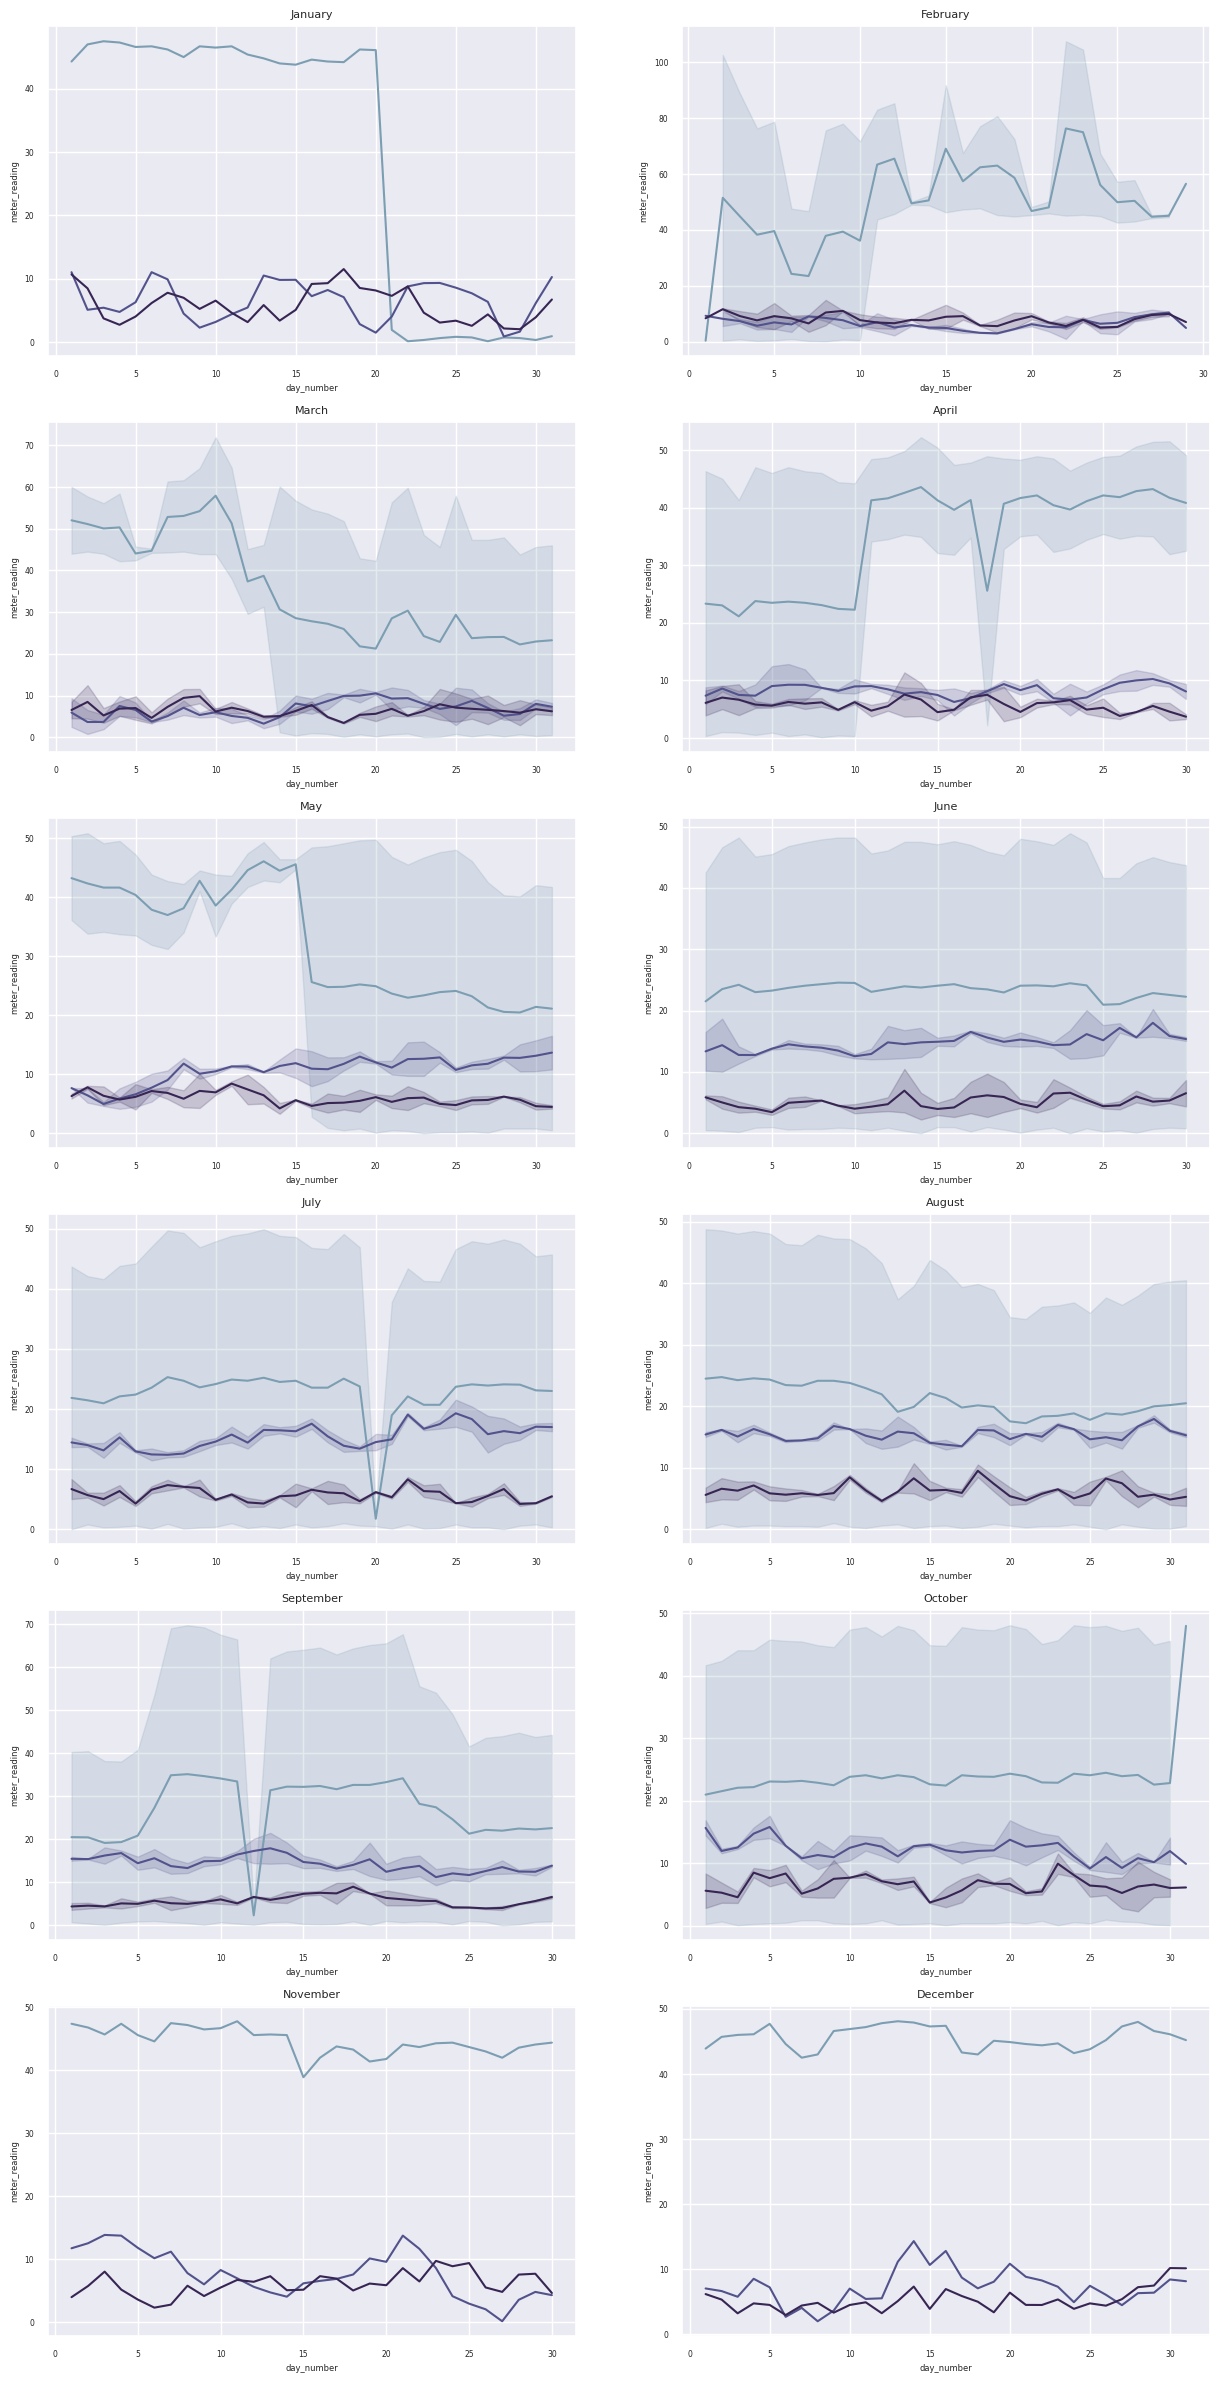

In [ ]:
sns.set(font_scale=0.5, rc={'figure.figsize':(25,8)})
fig, axes = plt.subplots(6, 2, figsize=(15, 30))
colors = np.array([
    [124, 158, 178],
    [82,82,140],
    [55,37,84]
])

for i in range(12):
    for j, col in enumerate([target, "airtemp_mean","windspeed_mean"]):
        sns.lineplot(data=full_data.loc[full_data["building_id"]==2].loc[full_data["meter"]==1].loc[full_data["month"]==i+1],
                    x="day_number", y=col, ax=axes[int(i/2)][i%2], color=colors[j]/255.)

    axes[int(i/2)][i%2].set_title(calendar.month_name[i+1], fontsize=8)

In [ ]:
site_id = 0
w_stats_0 = weather_data.loc[weather_data["site_id"]==site_id].set_index("day").resample('D')[['airTemperature',
                                                                       "windSpeed"]].agg(['min', 'max', "mean"]).to_records()
w_stats_df_0 = pd.DataFrame(w_stats_0)

In [ ]:
w_stats_0[:5]

rec.array([('2016-02-01T00:00:00.000000000',  8.2, 14.9, 10.84782609, 2. , 10.1,  5.93913043),
           ('2016-02-02T00:00:00.000000000',  8.3, 12. , 10.52916667, 3.2, 10.2,  7.06666667),
           ('2016-02-03T00:00:00.000000000',  5.1, 12.8, 10.34166667, 4.7,  9.5,  6.95833333),
           ('2016-02-04T00:00:00.000000000',  3.2, 10.8,  7.80833333, 3.1,  9.5,  6.25833333),
           ('2016-02-05T00:00:00.000000000', 10.1, 12. , 10.99166667, 7.2, 13.8, 10.02916667)],
          dtype=[('day', '<M8[ns]'), ("('airTemperature', 'min')", '<f8'), ("('airTemperature', 'max')", '<f8'), ("('airTemperature', 'mean')", '<f8'), ("('windSpeed', 'min')", '<f8'), ("('windSpeed', 'max')", '<f8'), ("('windSpeed', 'mean')", '<f8')])

In [ ]:
print("Shape:", w_stats_df_0.shape)
w_stats_df_0.head()

Shape: (699, 7)


,day,"('airTemperature', 'min')","('airTemperature', 'max')","('airTemperature', 'mean')","('windSpeed', 'min')","('windSpeed', 'max')","('windSpeed', 'mean')"
0,2016-02-01,8.2,14.9,10.847826,2.0,10.1,5.939130
1,2016-02-02,8.3,12.0,10.529167,3.2,10.2,7.066667
2,2016-02-03,5.1,12.8,10.341667,4.7,9.5,6.958333
3,2016-02-04,3.2,10.8,7.808333,3.1,9.5,6.258333
4,2016-02-05,10.1,12.0,10.991667,7.2,13.8,10.029167


In [ ]:
site_ids = weather_data["site_id"].unique()
dfs = []

for site_id in site_ids:
    w_stats = weather_data.loc[weather_data["site_id"]==site_id].set_index("day").resample('D')[['airTemperature',
                                                                        "windSpeed"]].agg(['min', 'max', "mean"]).to_records()
    w_stats_df = pd.DataFrame(w_stats)
    w_stats_df["site_id"] = site_id
    dfs.append(w_stats_df)

w_df = pd.concat(dfs, axis=0)  # concatenating the resulting dataframes to have one

print("Shape:", w_df.shape)
w_df.head()

Shape: (3495, 8)


,day,"('airTemperature', 'min')","('airTemperature', 'max')","('airTemperature', 'mean')","('windSpeed', 'min')","('windSpeed', 'max')","('windSpeed', 'mean')",site_id
0,2016-02-01,9.1,14.2,11.782609,2.9,10.4,6.343478,3
1,2016-02-02,6.0,12.0,9.700000,2.7,13.0,8.266667,3
2,2016-02-03,8.1,13.9,12.004167,5.8,13.1,9.887500,3
3,2016-02-04,2.4,10.4,6.925000,3.1,10.7,6.433333,3
4,2016-02-05,9.8,12.7,11.591667,9.0,13.5,10.316667,3


In [ ]:
w_df.isna().value_counts()

day    ('airTemperature', 'min')  ('airTemperature', 'max')  ('airTemperature', 'mean')  ('windSpeed', 'min')  ('windSpeed', 'max')  ('windSpeed', 'mean')  site_id
False  False                      False                      False                       False                 False                 False                  False      3495
dtype: int64

In [ ]:
full_data = full_data.merge(w_df, how="left", on=["day", "site_id"])
full_data.head()

,building_id,day,meter,meter_reading,site_id,primaryspaceusage,sub_primaryspaceusage,sqm,timezone,electricity,...,year,month,day_number,weekday,"('airTemperature', 'min')","('airTemperature', 'max')","('airTemperature', 'mean')","('windSpeed', 'min')","('windSpeed', 'max')","('windSpeed', 'mean')"
0,2,2016-02-02,1,102.6,2,3,9,811.0,0,1,...,2016,2,2,False,8.2,14.1,10.775000,2.3,16.9,11.937500
1,2,2016-02-02,2,0.3,2,3,9,811.0,0,1,...,2016,2,2,False,8.2,14.1,10.775000,2.3,16.9,11.937500
2,2,2016-02-03,1,88.8,2,3,9,811.0,0,1,...,2016,2,3,False,2.3,13.6,8.079167,2.8,16.8,10.945833
3,2,2016-02-03,2,0.1,2,3,9,811.0,0,1,...,2016,2,3,False,2.3,13.6,8.079167,2.8,16.8,10.945833
4,2,2016-02-04,1,76.3,2,3,9,811.0,0,1,...,2016,2,4,False,2.6,11.1,7.075000,7.1,12.8,10.029167


In [ ]:
for c in full_data.columns:
    if len(full_data[c].isna().unique())>1:
        print(full_data[c].isna().value_counts())
        print("\n")

In [ ]:
names = ["airtemp_min",
         "airtemp_max",
         "airtemp_mean",
         "windspeed_min",
         "windspeed_max",
         "windspeed_mean"]

_n = {c : n for c, n in zip(full_data.columns[-6:], names)}
full_data = full_data.rename(columns=_n)
full_data.head()

,building_id,day,meter,meter_reading,site_id,primaryspaceusage,sub_primaryspaceusage,sqm,timezone,electricity,...,year,month,day_number,weekday,airtemp_min,airtemp_max,airtemp_mean,windspeed_min,windspeed_max,windspeed_mean
0,2,2016-02-02,1,102.6,2,3,9,811.0,0,1,...,2016,2,2,False,8.2,14.1,10.775000,2.3,16.9,11.937500
1,2,2016-02-02,2,0.3,2,3,9,811.0,0,1,...,2016,2,2,False,8.2,14.1,10.775000,2.3,16.9,11.937500
2,2,2016-02-03,1,88.8,2,3,9,811.0,0,1,...,2016,2,3,False,2.3,13.6,8.079167,2.8,16.8,10.945833
3,2,2016-02-03,2,0.1,2,3,9,811.0,0,1,...,2016,2,3,False,2.3,13.6,8.079167,2.8,16.8,10.945833
4,2,2016-02-04,1,76.3,2,3,9,811.0,0,1,...,2016,2,4,False,2.6,11.1,7.075000,7.1,12.8,10.029167


In [ ]:
full_data.dtypes

building_id                       int64
day                      datetime64[ns]
meter                             int64
meter_reading                   float64
site_id                           int64
primaryspaceusage                 int64
sub_primaryspaceusage             int64
sqm                             float64
timezone                          int64
electricity                       int64
hotwater                          int64
water                             int64
gas                               int64
industry                          int64
subindustry                       int64
heatingtype                     float64
yearbuilt                       float64
numberoffloors                  float64
occupants                       float64
rating                          float64
year                              int64
month                             int64
day_number                        int64
weekday                            bool
airtemp_min                     float64


# Dealing with missing weather data

In [ ]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4459 entries, 168805 to 173263
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   building_id            4459 non-null   int64         
 1   day                    4459 non-null   datetime64[ns]
 2   meter                  4459 non-null   int64         
 3   meter_reading          4459 non-null   float64       
 4   site_id                4459 non-null   int64         
 5   primaryspaceusage      4459 non-null   int64         
 6   sub_primaryspaceusage  4459 non-null   int64         
 7   sqm                    4459 non-null   float64       
 8   timezone               4459 non-null   int64         
 9   electricity            4459 non-null   int64         
 10  hotwater               4459 non-null   int64         
 11  water                  4459 non-null   int64         
 12  gas                    4459 non-null   int64         
 

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=5)
cols_to_drop = ["airtemp_min",
         "airtemp_max",
         "airtemp_mean",
         "windspeed_min",
         "windspeed_max",
         "windspeed_mean"]
full_data = full_data.loc[full_data["airtemp_mean"].isna()].drop(columns=cols_to_drop)

In [ ]:
for c in full_data.columns:
    if len(full_data[c].isna().unique())>1:
        print(full_data[c].isna().value_counts())
        print("\n")

In [ ]:
def split_time_data(df:pd.DataFrame):
    _df = df.sort_values(by=["day"])
    split_percent = 0.8

    X = _df.drop(columns=[target]).loc[_df[target].isna()==False]
    Y = _df[target].loc[_df[target].isna()==False]

    X_train = X[:int(X.shape[0] * split_percent)].drop(columns=["day"])
    X_valid = X[int(X.shape[0] * split_percent):].drop(columns=["day"])
    Y_train = Y[:int(X.shape[0] * split_percent)]
    Y_valid = Y[int(X.shape[0] * split_percent):]

    return X_train, X_valid, Y_train, Y_valid

In [ ]:
X_train, X_valid, Y_train, Y_valid = split_time_data(full_data)

# Visualizing the choosen data set

<ipython-input-78-d702cca57869>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(full_data.corr(),


<Axes: >

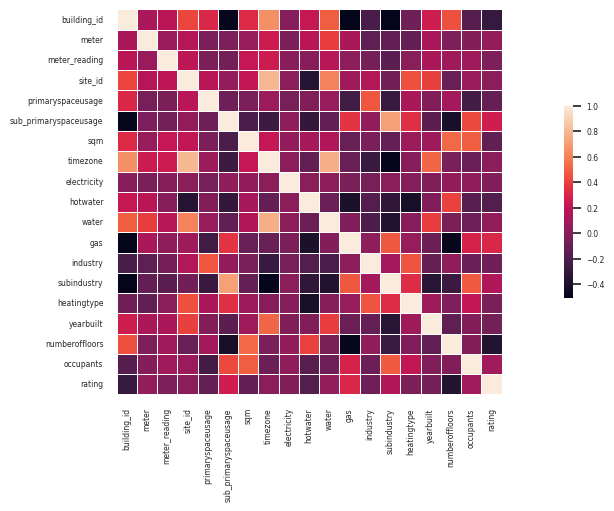

In [ ]:
# graphical settings, optional
sns.set(font_scale=0.5, rc={'figure.figsize':(16,5)})
# cmap = sns.diverging_palette(20, 250, as_cmap=True)

# code to produce the diagram:
sns.heatmap(full_data.corr(),
            # cmap=cmap,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .5})

In [ ]:
'''# storing columns to be dropped in a list
full_columns_to_drop = ['year','month','day_number','weekday']
# dropping the columns
full_data = full_data.drop(columns=full_columns_to_drop)'''

In [ ]:
full_data.shape

(4459, 24)

# Have to deal with outliers

In [ ]:
full_data.describe()

,building_id,meter,meter_reading,site_id,primaryspaceusage,sub_primaryspaceusage,sqm,timezone,electricity,hotwater,water,gas,industry,subindustry,heatingtype,yearbuilt,numberoffloors,occupants,rating
count,266266.00000,266266.000000,266266.000000,266266.000000,266266.000000,266266.000000,266266.000000,266266.000000,266266.000000,266266.000000,266266.000000,266266.000000,266266.000000,266266.000000,266266.000000,266266.000000,266266.000000,266266.000000,266266.000000
mean,307.23445,1.514354,3334.654306,2.236842,2.607656,10.767943,4967.476077,0.157895,0.997608,0.071770,0.098086,0.674641,1.373206,5.172249,3.978469,1965.954545,3.351675,277.131579,4.631579
std,186.33949,0.742450,19099.478354,0.957911,2.231604,6.777489,4873.283464,0.364643,0.048853,0.258108,0.297432,0.468510,0.578276,3.651577,1.180796,28.638626,2.568355,340.770258,1.853013
min,2.00000,1.000000,0.000000,1.000000,1.000000,1.000000,358.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1900.000000,1.000000,0.000000,1.000000
25%,153.00000,1.000000,20.100000,2.000000,1.000000,6.000000,1457.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,1954.000000,2.000000,48.000000,3.000000
50%,290.00000,1.000000,306.269250,2.000000,1.000000,9.000000,2932.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,4.000000,4.000000,1976.000000,2.000000,142.500000,5.000000
75%,473.00000,2.000000,1555.301250,2.000000,4.000000,17.000000,6671.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,9.000000,4.000000,1976.000000,4.000000,352.000000,6.000000
max,632.00000,4.000000,500164.777000,5.000000,12.000000,26.000000,25605.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,12.000000,12.000000,2013.000000,16.000000,1695.000000,9.000000


In [ ]:
cluster_sizes = df_cluster_2['drop_clusters'].value_counts()
small_clusters = cluster_sizes[cluster_sizes < 100].index.tolist()
df_cluster_2.loc[df_cluster_2['drop_clusters'].isin(small_clusters), 'drop_clusters'] = 66

# Basically using and testing different models

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, Y_train)

score = reg.score(X_valid, Y_valid)
print("Score: {}".format(score))

Score: 0.8391936718598727


In [ ]:
from sklearn.model_selection import train_test_split
# note, the parameter is called test_size, but in fact it refers to validation set. This might be confusing
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.2,
                                                      random_state=42, shuffle=True)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_log_error as MSLE
from sklearn.neighbors import NearestNeighbors, KNeighborsRegressor

reg = LinearRegression(positive=True).fit(full_data[["building_id", "meter"]], full_data["meter_reading"])
res = reg.predict(full_data[["building_id", "meter"]])

In [ ]:
# Function from kaggle

def create_prediction_file(results:list | np.ndarray, results_dir="./"):
    """
    Function that formats predictions and writes them to a .csv file ready for submission.

    :param: results         results to write to the file, list | array
    :param: results_dir     directory to write the results file to, str, default current working directory
                            make sure the directory exists before writing the files there.

    """
    csv_fname = "results_{}.csv".format(datetime.now().strftime('%b%d_%H-%M-%S'))
    with open(os.path.join(results_dir, csv_fname), 'w') as f:
        f.write('id,meter_reading\n')
        for i, value in enumerate(results):
            f.write(str(i) + ',' + str(max(0, value)) + '\n')
    return True

In [ ]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_valid, Y_train, Y_valid = split_time_data(full_data)

model = RandomForestRegressor(n_estimators=10, random_state=154).fit(X_train, Y_train)
score = model.score(X_valid, Y_valid)
print(score)

0.9628227189383272


In [ ]:
predictions = model.predict(X_valid)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_valid, predictions)

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(Y_valid, predictions)

# Compute Root Mean Squared Error (RMSE)
rmse = mean_squared_error(Y_valid, predictions, squared=False)

# Compute R-squared (R^2) score
r2 = r2_score(Y_valid, predictions)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared (R^2) Score:", r2)

Mean Absolute Error: 1254.704107562324
Mean Squared Error: 3081953.48156634
Root Mean Squared Error: 1755.5493389723742
R-squared (R^2) Score: 0.9440103557689438


In [ ]:
def create_prediction_file(results:list | np.ndarray, results_dir="./"):
    """
    Function that formats predictions and writes them to a .csv file ready for submission.

    :param: results         results to write to the file, list | array
    :param: results_dir     directory to write the results file to, str, default current working directory
                            make sure the directory exists before writing the files there.

    """
    csv_fname = "results_{}.csv".format(datetime.now().strftime('%b%d_%H-%M-%S'))
    with open(os.path.join(results_dir, csv_fname), 'w') as f:
        f.write('id,meter_reading\n')
        for i, value in enumerate(results):
            f.write(str(i) + ',' + str(max(0, value)) + '\n')
    return True

In [ ]:
# saving the final prediction files
create_prediction_file(predictions, results_dir="/content/drive/Shareddrives/Ai/What are we doing(AI)?/Results")  # folder where the file lies

True

In [ ]:
# saving the final prediction files
create_prediction_file(res, results_dir="/content/drive/Shareddrives/Ai/What are we doing(AI)?/Results")  # folder where the file lies

In [ ]:
test = pd.read_csv("/content/drive/Shareddrives/Ai/What are we doing(AI)?/Results", index_col=0)

def create_prediction_file(results:list | np.ndarray, results_dir="./"):
    """
    Function that formats predictions and writes them to a .csv file ready for submission.

    :param: results         results to write to the file, list | array
    :param: results_dir     directory to write the results file to, str, default current working directory
                            make sure the directory exists before writing the files there.

    """
    csv_fname = "results_{}.csv".format(datetime.now().strftime('%b%d_%H-%M-%S'))
    with open(os.path.join(results_dir, csv_fname), 'w') as f:
        f.write('id, meter_reading\n')
        for i, value in enumerate(results):
            f.write(str(i) + ',' + str(max(0, value)) + '\n')
    return True

In [ ]:
# example for one of the prediction type
from sklearn.neighbors import KNeighborsRegressor
nbrs = KNeighborsRegressor(n_neighbors=20, algorithm='kd_tree')

In [ ]:
# sample file for running different solutions
nbrs.fit(train[["building_id", "meter"]], train["meter_reading"])
res = nbrs.predict(test[["building_id", "meter"]])
create_prediction_file(res, results_dir="../kaggle_data/tutorial_results/")

NameError: name 'train' is not defined

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=0).fit(X_train,Y_train)
print("Score: {}".format(model.score(X_valid,Y_valid)))

Score: 0.9440103557689438


# Train Test split data for testing

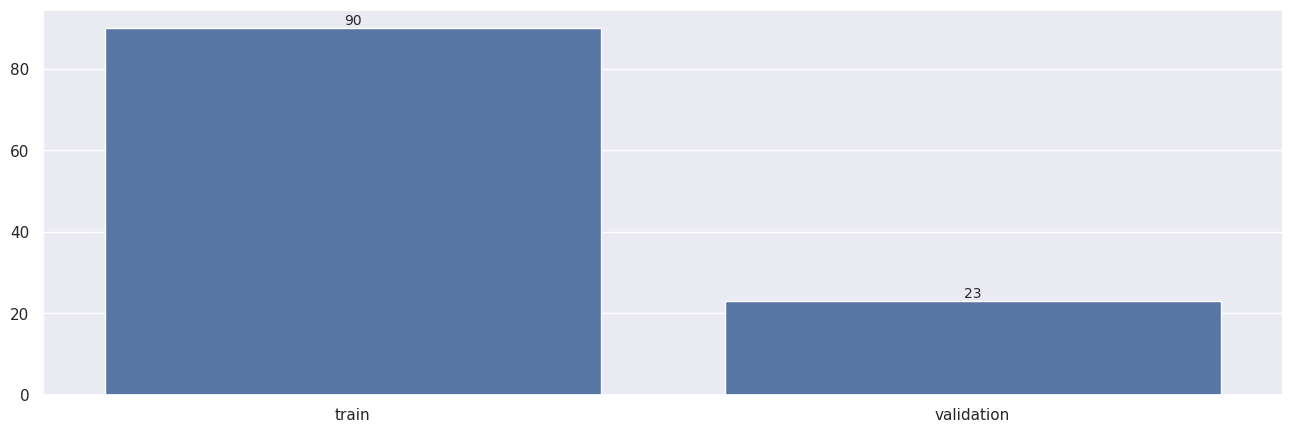

In [ ]:
# visualization of data split
sns.set()
ax = sns.barplot(y=[X_train.shape[0], X_valid.shape[0]], x=["train", "validation"])
_ = ax.bar_label(ax.containers[0], fontsize=10)  # plotting the actual size on top of the bars

<Axes: xlabel='sqm', ylabel='occupants'>

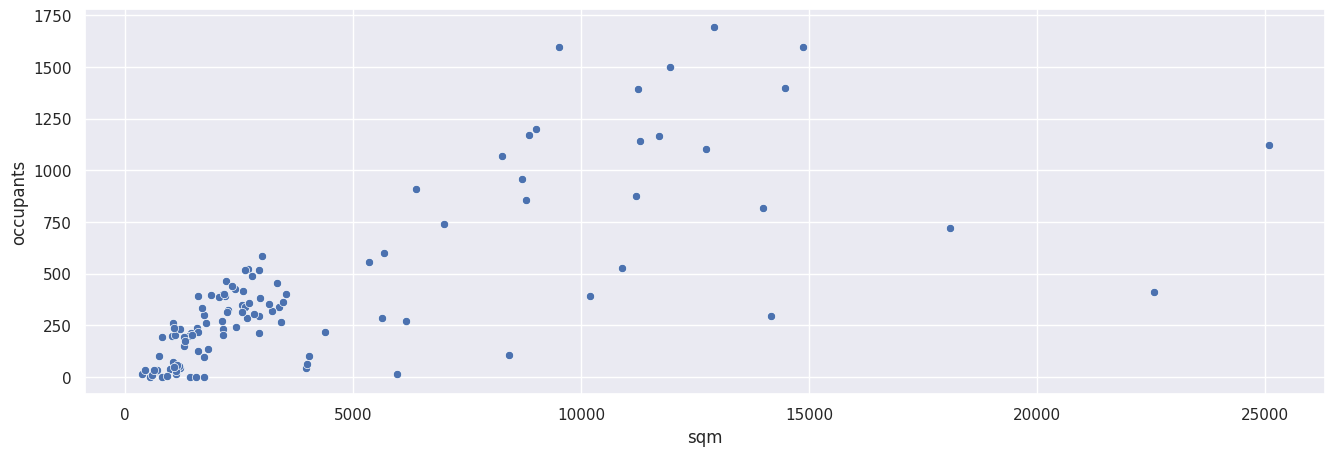

In [ ]:
# scatterplots
sns.scatterplot(x = X["sqm"], y = Y)

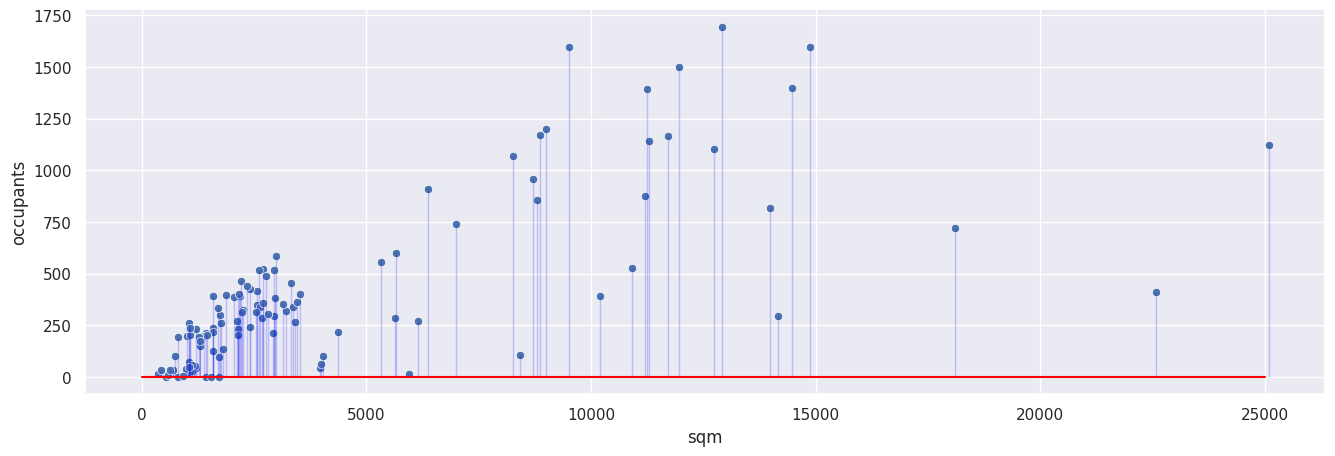

In [ ]:
# we can check each feature against our final test set to draw importance and conclusions
ax = sns.scatterplot(x = X["sqm"], y = Y)

sns.lineplot(x=[0,25000], y=[0, 0], color=(1, 0,0 ), ax=ax)
for x, y in zip(X["sqm"], Y):
    y_coord = 0 * x
    sns.lineplot(x=[x, x], y=[y_coord, y], color = (0,0,1))

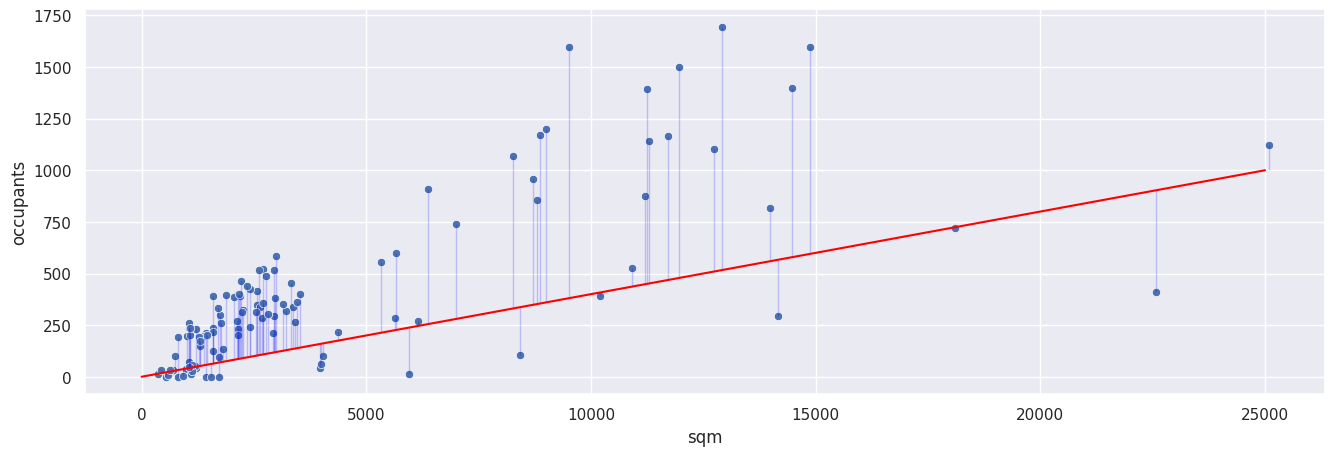

In [ ]:
# One more method of doing the same
ax = sns.scatterplot(x = X["sqm"], y = Y)

sns.lineplot(x=[0,25000], y=[0, 1000], color=(1, 0,0 ), ax=ax)
for x, y in zip(X["sqm"], Y):
    y_coord = 1 / 25 * x
    sns.lineplot(x=[x, x], y=[y_coord, y], color = (0,0,1))

# Linear regression

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Score: 0.5525741449457944


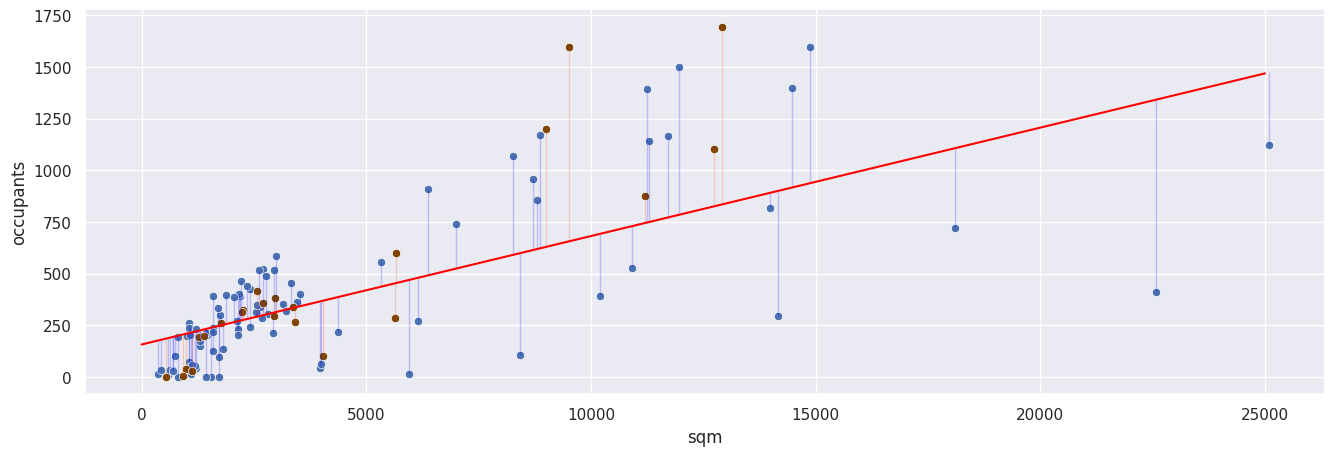

In [ ]:
# Here we are visualizing our linear regression results with scatter plot
x = [0, 25000]
train_predict = reg.predict(X_train[features])
valid_predict = reg.predict(X_valid[features])

ax = sns.scatterplot(x = X_train["sqm"], y = Y_train)
sns.scatterplot(x = X_valid["sqm"], y = Y_valid, color=(0.49, 0.27, 0.003))

# our regression line
sns.lineplot(x=x, y=reg.predict(np.array(x).reshape(-1,1)), color=(1, 0, 0 ), ax=ax)

# regression results for train set
for i, (x, y) in enumerate(zip(X_train["sqm"], Y_train)):
    y_coord = reg
    sns.lineplot(x=[x, x], y=[train_predict[i], y], color = (0,0,1))

# regression results for validation set
for i, (x, y) in enumerate(zip(X_valid["sqm"], Y_valid)):
    y_coord = reg
    sns.lineplot(x=[x, x], y=[valid_predict[i], y], color = (0.99, 0.26, 0.01))

print("Score: {}".format(reg.score(X_valid[features], Y_valid)))

# Combining features of our choosen data set to improvise our model

In [ ]:
# checking with few chosen features
features = ["sqm", "numberoffloors"]  # columns you want to use for the linear regression

reg = LinearRegression().fit(X_train[features], Y_train)

score = reg.score(X_valid[features], Y_valid)
print("Score: {}".format(score))

Score: 0.020292510184991674


In [ ]:
# checking if what model features are considred imporant
model.feature_importances_
index = np.argmax(model.feature_importances_) # index of the highest value
print("Index of the highest value is          {}".format(index))
highest_value = model.feature_importances_[index]
print("Highest value is      {}".format(highest_value))
feature_name = X_train.columns[index]
print("The most important feature is        {}".format(feature_name))

Index of the highest value is          5
Highest value is      0.6815287155795355
The most important feature is        sqm


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 4.3 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor

In [ ]:
x =full_data.drop('meter_reading',axis=1)
y =full_data['meter_reading']

In [ ]:
model = CatBoostRegressor(iterations=200, depth=10, learning_rate=0.1,random_state=7)
model.fit(x, y, verbose=False)

NameError: name 'x' is not defined